In [1]:
# Generate our matrix
def D2_matrix(dimension):
    """Used to create a specific nxn matrix that has important applications towards approximating the
    second derivative and second antiderivative of functions.
    
    This is an nxn matrix with 1,-2,1 in each row and -2 in the diagonal. We'll make a matrix with
    the 1,-2 bit, and then add it to a separate matrix with the right-most 1 implemented."""
    import numpy as np
    

    # FIRST MATRIX
    # Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal 1's
    matrix1 = np.zeros((dimension-1,dimension-1), dtype = "int8")
    np.fill_diagonal(matrix1,int(1))




    # Add a row of 0's to the top and column of 0's to the right
    row = np.zeros((dimension-1,1), dtype = "int8")
    matrix1 = np.hstack((matrix1, row))

    column = np.zeros((1,dimension), dtype = "int8")
    matrix1 = np.vstack((column, matrix1))

    # Replace the new diagonals with -2
    np.fill_diagonal(matrix1,int(-2))



    # SECOND MATRIX
    # Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal 1's
    matrix2 = np.zeros((dimension-1,dimension-1), dtype = "int8")
    np.fill_diagonal(matrix2,int(1))
        
    # Add a row of 0's to the bottom and a column of 0's to the left
    row = np.zeros((dimension-1,1), dtype = "int8")
    matrix2 = np.hstack((row, matrix2))

    column = np.zeros((1,dimension), dtype = "int8")
    matrix2 = np.vstack((matrix2, column))

        
        
        
    # Add the two matrices together to get our intended matrix
    matrix = matrix1 + matrix2
    
    
    
    
    return matrix

# Graph values
def graph_points(x,y, col):
    """Inputs our array of inputs x and outputs y to make a graph,
        and col to determine the colors of each point."""
    import matplotlib.pyplot as plt
    
    # Graph everything
    plt.scatter(x,y, color=col)
            
        
    
    # Make cosmetic expectations and display graph
    plt.grid()
    plt.xlabel("D2 Matrix Size")
    plt.ylabel("Eigenvalues")
    plt.show()

In [2]:
def eigen_plotting(max_dimension):
    """For our nxn matrix D2, our x-value is n and our y-values are its corresponding eigenvalues.
    
    Note that if an x-value has multiply y-values (so a matrix size has multiply eigenvalues),
    repeat the x-value to match the y-values."""
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    
    begin = round(time(),2)   
    
    
    
    # Set our X, Y values, and point colors to empty arrays/lists, which we will append as needed.
    x_val = np.array([])
    y_val = np.array([])
    colors = []
    
    # Create our array of eigenvalues and its corresponding inputs
    # A 1x1 matrix has no eigenvalues, so we start with a 2x2 matrix.
    # If an input has even 1 y-value that is 0, then all points for that size must be red
    # Otherwize it will be black
    for dimension in range(2, max_dimension+1):
        values, vectors = np.linalg.eig( D2_matrix(dimension) )
        print(values)
        
        # Create a temporary array of our y-values
        y_temp = values.real
        
        # Create a temporary colors list based on if there's a 0 in this array
        if (y_temp != 0).all() == False:
            col_temp = ["red"] * y_temp.size
        else:
            col_temp = ["black"] * y_temp.size
            
        
        # Set a temporary x to be an array of equal length to the temporary y array
        x_temp = np.ones( y_temp.size) * dimension
        
        
        
        
        # Append our temporary arrays to our actual x, y, and color arrays/lists
        x_val = np.append( x_val , x_temp )
        y_val = np.append( y_val , y_temp )
        colors = colors + col_temp

    
    
    # Make our graph
    graph_points(x_val,y_val, colors)

    
    
    
    # Clarify if there were any y-values equal to 0
    if (y_val != 0).all() == True:
        print(f"None of the eigenvalues up to the {max_dimension}x{max_dimension} matrix were equivalent to 0.")
    
    end = round(time(),2)
    print(f"Finished in {round(end-begin,2)} seconds.")

[-1. -3.]
[-3.41421356 -2.         -0.58578644]
[-3.61803399 -2.61803399 -0.38196601 -1.38196601]
[-3.73205081 -3.         -2.         -0.26794919 -1.        ]
[-3.80193774 -3.2469796  -2.44504187 -0.19806226 -1.55495813 -0.7530204 ]
[-3.84775907 -3.41421356 -2.76536686 -2.         -0.15224093 -0.58578644
 -1.23463314]
[-3.87938524 -3.53208889 -3.         -2.34729636 -1.65270364 -0.12061476
 -0.46791111 -1.        ]
[-3.90211303 -3.61803399 -3.1755705  -2.61803399 -2.         -0.09788697
 -0.38196601 -1.38196601 -0.8244295 ]
[-3.91898595 -3.68250707 -3.30972147 -2.83083003 -2.28462968 -1.71537032
 -0.08101405 -0.31749293 -0.69027853 -1.16916997]
[-3.93185165 -3.73205081 -3.41421356 -3.         -2.51763809 -2.
 -1.48236191 -0.06814835 -0.26794919 -0.58578644 -1.        ]
[-3.94188363 -3.77091205 -3.4970215  -3.13612949 -2.70920977 -2.24107336
 -1.75892664 -0.05811637 -0.22908795 -0.5029785  -1.29079023 -0.86387051]
[-3.94985582 -3.80193774 -3.56366296 -3.2469796  -2.86776748 -2.44504187

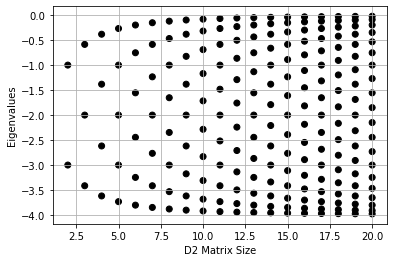

None of the eigenvalues up to the 20x20 matrix were equivalent to 0.
Finished in 0.15 seconds.


In [5]:
eigen_plotting(20)